## Trabajo aprendizaje supervisado
* Stiven Cadavid Cataño

* Objetivo: Se requiere un modelo que ayude a identificar la posible fuga de clientes en una empresas de telecomunicaciones donde se espera identificarlos para ajustarles una oferta que se ajsute a sus necesidades y permanezca en la compañia dado que el eslogan de la compañia es que cuesta 7 veces más adquirir un cliente nuevo que reter a uno.

Se espera encotrar un modelo supervisado que logre identificar en su mayoria los clientes que se van dejar la compañia dado que el costo de adquisición es más alto, por tanto, el negocio prefiere brindarle una oferta de retención así no tenga incentivos a retirarse es decir acpeta o tiene cierta tolerancia con aquellos que el modelo predice como churn y en realidad no lo son y si exige mayor cautela con aquellos que no son clasificadods como churn y si se van.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from scipy.stats import norm, skew
from scipy import stats
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.impute import KNNImputer
import optuna
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import os
import warnings
import pingouin as pg
from utils.funciones import multiple_plot
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
import joblib
from sklearn.metrics import f1_score, precision_recall_curve

c:\Users\Usser\anaconda3\envs\myenv\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
c:\Users\Usser\anaconda3\envs\myenv\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Descripciones de las Variables:
* customerID: ID del cliente.
* gender: género del cliente (Masculino/Femenino).
* seniorCitizen: indica si el cliente es un ciudadano senior (1/0).
* partner: indica si el cliente tiene pareja (Sí/No).
* dependents: indica si el cliente tiene dependientes (Sí/No).
* tenure: número de meses que el cliente ha estado con la compañía.
* phoneService: indica si el cliente tiene servicio telefónico (Sí/No).
* multipleLines: indica si el cliente tiene múltiples líneas (Sí/No/Sin servicio telefónico).
* internetService: proveedor de servicio de internet del cliente (DSL/Fibra óptica/No).
* onlineSecurity: indica si el cliente tiene seguridad en línea (Sí/No/Sin servicio de internet).
* onlineBackup: indica si el cliente tiene respaldo en línea (Sí/No/Sin servicio de internet).
* deviceProtection: indica si el cliente tiene protección de dispositivos (Sí/No/Sin servicio de internet).
* techSupport: indica si el cliente tiene soporte técnico (Sí/No/Sin servicio de internet).
* streamingTV: indica si el cliente tiene servicio de TV por streaming (Sí/No/Sin servicio de internet).
* streamingMovies: indica si el cliente tiene servicio de películas por streaming (Sí/No/Sin servicio de internet).
* contract: término del contrato del cliente (Mes a mes/Un año/Dos años).
* paperlessBilling: indica si el cliente tiene facturación sin papeles (Sí/No).
* paymentMethod: método de pago del cliente (Cheque electrónico/Cheque enviado/Transferencia bancaria automática/Tarjeta de crédito automática).
* monthlyCharges: cantidad cobrada al cliente mensualmente.
* totalCharges: cantidad total cobrada al cliente.
* churn: indica si el cliente se dio de baja de la compañia (Sí/No).

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
print(df.shape)
df.head(2)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce') ## transformación de variables

In [6]:
df.isna().sum(), df.info() ## tipo de dato de cada uno de los campos a utiizar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64,
 None)

## Funciones

In [7]:
def apply_threshold(probas, threshold):
    return (probas >= threshold).astype(int)

def find_best_threshold(model, X, y):
    # Predict probabilities
    probas = model.predict_proba(X)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y, probas)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    max_index = np.argmax(f1_scores)
    # Esto me va a devolver el máximo f1
    return thresholds[max_index], f1_scores[max_index]

### Visualización

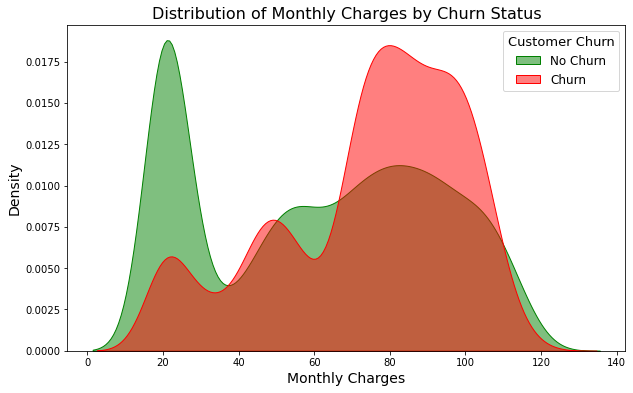

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')],
                 color="green", shade=True, label="No Churn", alpha=0.5)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')],
                 color="red", shade=True, label="Churn", alpha=0.5)
ax.legend(title='Customer Churn', title_fontsize='13', fontsize='12', loc='upper right')
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('Monthly Charges', fontsize=14)
ax.set_title('Distribution of Monthly Charges by Churn Status', fontsize=16)
plt.show()

La distribución de esta variable es un indicativo de que puede ser una muy buena predictora sobretodo si los cargos mensulaes son menores a 40 hay menor porcentaje de no retiro que de retiro.

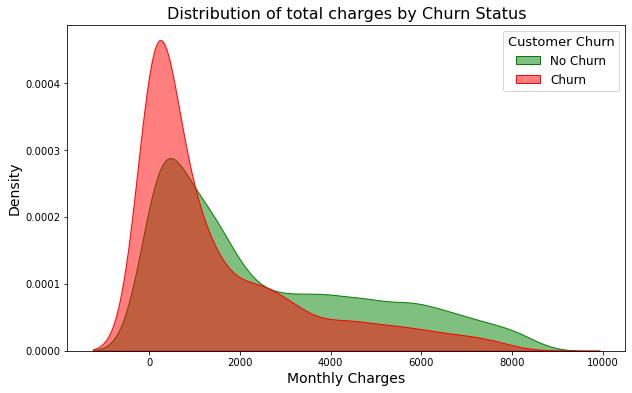

In [9]:
plt.figure(figsize=(10, 6))  
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')],
                 color="green", shade=True, label="No Churn", alpha=0.5)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')],
                 color="red", shade=True, label="Churn", alpha=0.5)
ax.legend(title='Customer Churn', title_fontsize='13', fontsize='12', loc='upper right')
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('Monthly Charges', fontsize=14)
ax.set_title('Distribution of total charges by Churn Status', fontsize=16)
plt.show()


La distribución de esta variable es un indicativo de que puede ser una muy buena predictora dada la distribución de cada uno de los cargos totales mensuales versus el churn.

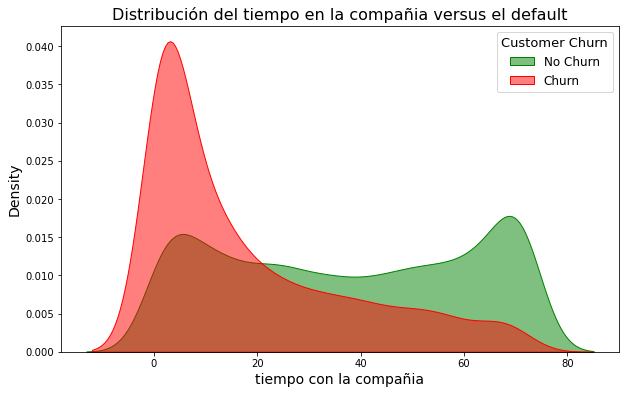

In [10]:
plt.figure(figsize=(10, 6))  
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'No')],
                 color="green", shade=True, label="No Churn", alpha=0.5)
ax = sns.kdeplot(df.tenure[(df["Churn"] == 'Yes')],
                 color="red", shade=True, label="Churn", alpha=0.5)
ax.legend(title='Customer Churn', title_fontsize='13', fontsize='12', loc='upper right')
ax.set_ylabel('Density', fontsize=14)
ax.set_xlabel('tiempo con la compañia', fontsize=14)
ax.set_title('Distribución del tiempo en la compañia versus el default', fontsize=16)
plt.show()


La distribución de esta variable es un indicativo de que puede ser una muy buena predictora dada la distribución ante menor tiempo del cliente en la compañia mayor es la cantidad que se retiran

Importo libreria proveida por Jorge Bedoya

In [11]:
num_cols=df.select_dtypes(exclude='object').drop('SeniorCitizen',axis=1).columns

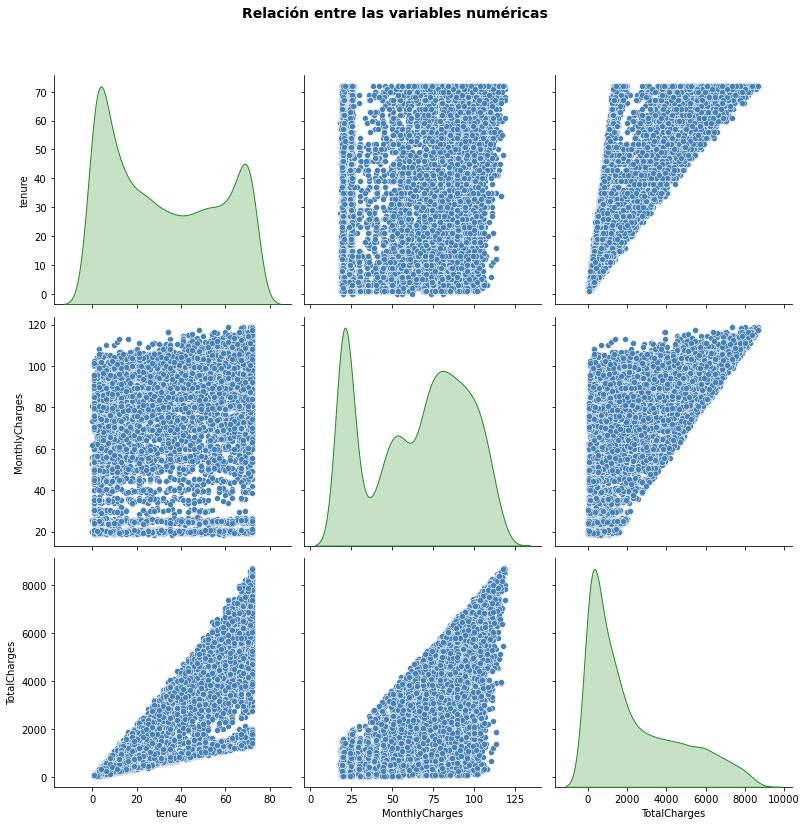

In [12]:
#Visualización de variables numéricas con respecto a las varaibles numericas
multiple_plot(1, df , num_cols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

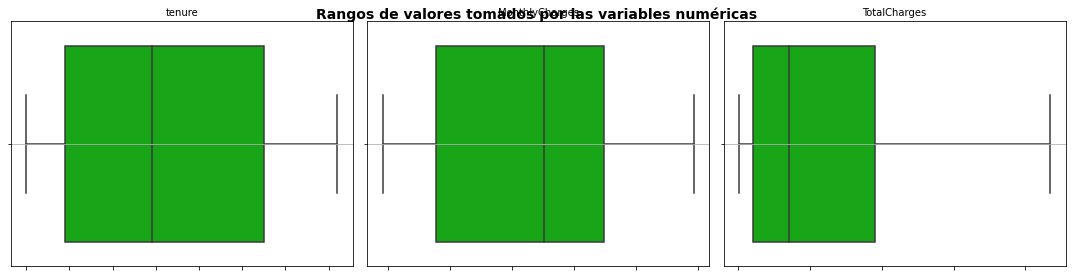

In [13]:
multiple_plot(3, df, num_cols, None, 'boxplot', "Rangos de valores tomados por las variables numéricas", 20)


 No se identifican outliers por ello no es necesario hacer un tratamiento alrededor de ellos.

In [14]:
df.groupby(['Churn']).agg({'MonthlyCharges':['mean','count']})

MonthlyCharges      
                mean count
Churn                     
No         61.265124  5174
Yes        74.441332  1869

#### Ahora para respaldar el análisis anterior vamos a realizar un test de medias 

##### Hipótesis Nula (H0):
- No existe diferencia significativa en las medias entre los dos grupos.

##### Hipótesis Alternativa (H1):
- Existe una diferencia significativa en las medias entre los dos grupos.

In [15]:
pg.ttest(df.loc[df['Churn']=='No', 'MonthlyCharges'],
 df.loc[df['Churn']=='Yes', 'MonthlyCharges'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-18.407527,4135.795018,two-sided,8.592449e-73,"[-14.58, -11.77]",0.446283,1.519e+70,1.0


Esto indica que la prueba de hipótesis es de dos colas, lo que significa que se consideran diferencias en ambas direcciones (mayor que o menor que) para evaluar la significancia estadística.

In [16]:
pg.ttest(df.loc[df['Churn']=='No', 'tenure'],
 df.loc[df['Churn']=='Yes', 'tenure'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,34.823819,4048.287609,two-sided,1.195495e-232,"[18.49, 20.69]",0.85225,1.1e+241,1.0


* Se rechaza la hipotesis nula y se determina que las dos distribuciones son diferentes

In [17]:
df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

* Inspeccion de variables categoricas

In [18]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'SeniorCitizen': [0 1]
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique valu

Se realiza la imputación de los 11 unicos registros nulos usando imputación por vecinos cercanos de sklearn 

In [19]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
columns_to_imputate =[ 'TotalCharges']
# Aplicar KNN imputer solo a las columnas seleccionadas
df_imputed_partial = df[columns_to_imputate].copy()
df_imputed_partial[:] = imputer.fit_transform(df_imputed_partial)
df['TotalCharges'] = df_imputed_partial['TotalCharges']


In [20]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('customerID')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [21]:
cat_cols.remove('Churn') 

In [22]:
# Apply one-hot encoding to categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [23]:
scaler = MinMaxScaler()
nu_vars=['TotalCharges', 'MonthlyCharges', 'tenure']

In [24]:
## dado el descriptivo creo una variable dummy para darle señales al modelo de la improtancia de valores altos sobre el churn
df['HighTotalCharges'] = (df['TotalCharges'] > df['TotalCharges'].median()).astype(int)

In [25]:
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

In [26]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

In [27]:
## Se realiza la división del dataset de modo que se guarde un porcentaje de la data para validación
print("Training set size: ", X_train.shape)
print("Validation set size: ", X_val.shape)
print("Test set size: ", X_test.shape)

Training set size:  (3697, 31)
Validation set size:  (1233, 31)
Test set size:  (2113, 31)


In [28]:
X_train[nu_vars] = scaler.fit_transform(X_train[nu_vars])
X_test[nu_vars] = scaler.transform(X_test[nu_vars])
X_val[nu_vars] = scaler.transform(X_val[nu_vars])

In [29]:
joblib.dump(scaler, 'objetos/scaler_mm_v1.joblib')


['objetos/scaler_mm_v1.joblib']

In [30]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,HighTotalCharges
4777,0,0.027778,0.331839,0.010085,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5562,1,0.777778,0.583956,0.491224,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
5601,0,0.486111,0.225710,0.157489,0,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3010,1,0.527778,0.619831,0.362780,1,0,1,1,0,1,...,0,0,0,0,0,1,0,0,1,1
2630,0,0.875000,0.661684,0.618394,1,1,0,1,0,1,...,0,0,0,0,1,1,1,0,0,1


### Se van a realizar busqueda de hiperparametros tratando de maximizar el AUC.
para los modelos:
* Loggistic Regression (algoritmo clasico)
* Random Forest Classifier (algoritmo de bagging)
* Xgboost (algoritmo de boosting)
* Lightgbm (algoritmo de boosting)
* Decision tree

* Regresion logistica

In [31]:
def objective_lr(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    classifier = LogisticRegression(C=C, random_state=42, solver='liblinear')
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=30)

[I 2024-05-03 20:04:21,765] A new study created in memory with name: no-name-11ccd5a9-8346-472b-98b3-fa05df6bc07a
[I 2024-05-03 20:04:21,857] Trial 0 finished with value: 0.8229016863428955 and parameters: {'C': 0.0040078837883462575}. Best is trial 0 with value: 0.8229016863428955.
[I 2024-05-03 20:04:21,988] Trial 1 finished with value: 0.8343295656856318 and parameters: {'C': 267.14943195149306}. Best is trial 1 with value: 0.8343295656856318.
[I 2024-05-03 20:04:22,110] Trial 2 finished with value: 0.8341189916593853 and parameters: {'C': 5.187384958294334}. Best is trial 1 with value: 0.8343295656856318.
[I 2024-05-03 20:04:22,253] Trial 3 finished with value: 0.8343143568732148 and parameters: {'C': 671.3671344998228}. Best is trial 1 with value: 0.8343295656856318.
[I 2024-05-03 20:04:22,338] Trial 4 finished with value: 0.8322533434667863 and parameters: {'C': 0.13252039621227416}. Best is trial 1 with value: 0.8343295656856318.
[I 2024-05-03 20:04:22,462] Trial 5 finished with

* Random forest

In [32]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
    class_weight_options = [None, "balanced"]
    class_weight = trial.suggest_categorical('class_weight', class_weight_options)
    classifier = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,class_weight=class_weight,
        random_state=42)
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score
study_rf = optuna.create_study(direction='maximize',study_name='RF1')
study_rf.optimize(objective_rf, n_trials=30)

[I 2024-05-03 20:04:25,541] A new study created in memory with name: RF1
[I 2024-05-03 20:04:27,735] Trial 0 finished with value: 0.8353390229878528 and parameters: {'n_estimators': 150, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 14, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8353390229878528.
[I 2024-05-03 20:04:29,216] Trial 1 finished with value: 0.8347796778093125 and parameters: {'n_estimators': 106, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 23, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8353390229878528.
[I 2024-05-03 20:04:31,143] Trial 2 finished with value: 0.8343736359023197 and parameters: {'n_estimators': 144, 'max_depth': 26, 'min_samples_split': 17, 'min_samples_leaf': 37, 'class_weight': None}. Best is trial 0 with value: 0.8353390229878528.
[I 2024-05-03 20:04:32,946] Trial 3 finished with value: 0.8339514061055604 and parameters: {'n_estimators': 129, 'max_depth': 24, 'min_samples_split': 14, 'min_sam

* Xgboost

In [33]:
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    classifier = XGBClassifier(
        n_estimators=n_estimators, max_depth=max_depth,
        learning_rate=learning_rate, colsample_bytree=colsample_bytree,
        random_state=42)
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score
study_xgb = optuna.create_study(direction='maximize',study_name='XGB1')
study_xgb.optimize(objective_xgb, n_trials=30)

[I 2024-05-03 20:05:33,733] A new study created in memory with name: XGB1


[20:05:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:05:47,080] Trial 0 finished with value: 0.7796945839094659 and parameters: {'n_estimators': 935, 'max_depth': 8, 'learning_rate': 0.18604006755603636, 'colsample_bytree': 0.5329517467020315}. Best is trial 0 with value: 0.7796945839094659.


[20:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:06:00,130] Trial 1 finished with value: 0.7964875509427538 and parameters: {'n_estimators': 989, 'max_depth': 7, 'learning_rate': 0.048489764971172425, 'colsample_bytree': 0.7506813262777965}. Best is trial 1 with value: 0.7964875509427538.


[20:06:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:06:10,035] Trial 2 finished with value: 0.8034792049437451 and parameters: {'n_estimators': 384, 'max_depth': 15, 'learning_rate': 0.04161795638459885, 'colsample_bytree': 0.7180700655482061}. Best is trial 2 with value: 0.8034792049437451.


[20:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:06:20,982] Trial 3 finished with value: 0.7894978598875838 and parameters: {'n_estimators': 851, 'max_depth': 8, 'learning_rate': 0.11043043234089421, 'colsample_bytree': 0.8342781104627552}. Best is trial 2 with value: 0.8034792049437451.


[20:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:06:30,076] Trial 4 finished with value: 0.7997011204428495 and parameters: {'n_estimators': 827, 'max_depth': 7, 'learning_rate': 0.05099186863062828, 'colsample_bytree': 0.6337308054425076}. Best is trial 2 with value: 0.8034792049437451.


[20:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:06:33,092] Trial 5 finished with value: 0.8045672772336661 and parameters: {'n_estimators': 247, 'max_depth': 9, 'learning_rate': 0.09237761854150885, 'colsample_bytree': 0.529569074329352}. Best is trial 5 with value: 0.8045672772336661.


[20:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:06:46,651] Trial 6 finished with value: 0.7938320505854957 and parameters: {'n_estimators': 721, 'max_depth': 12, 'learning_rate': 0.06474548163819632, 'colsample_bytree': 0.9771043762026306}. Best is trial 5 with value: 0.8045672772336661.


[20:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:06:59,581] Trial 7 finished with value: 0.8075028119099648 and parameters: {'n_estimators': 927, 'max_depth': 8, 'learning_rate': 0.021926163940512458, 'colsample_bytree': 0.9681688021242588}. Best is trial 7 with value: 0.8075028119099648.


[20:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:02,706] Trial 8 finished with value: 0.7900779784436891 and parameters: {'n_estimators': 267, 'max_depth': 9, 'learning_rate': 0.27185312784692517, 'colsample_bytree': 0.6354765455212019}. Best is trial 7 with value: 0.8075028119099648.


[20:07:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:06,060] Trial 9 finished with value: 0.7995011569192643 and parameters: {'n_estimators': 221, 'max_depth': 10, 'learning_rate': 0.12395600904541844, 'colsample_bytree': 0.5957546977772897}. Best is trial 7 with value: 0.8075028119099648.


[20:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:11,925] Trial 10 finished with value: 0.8287434424198985 and parameters: {'n_estimators': 593, 'max_depth': 5, 'learning_rate': 0.01332718521402522, 'colsample_bytree': 0.9810980522308517}. Best is trial 10 with value: 0.8287434424198985.


[20:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:15,125] Trial 11 finished with value: 0.8348922073939253 and parameters: {'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.013580550545602548, 'colsample_bytree': 0.9982153889619004}. Best is trial 11 with value: 0.8348922073939253.


[20:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:18,016] Trial 12 finished with value: 0.8363862730772984 and parameters: {'n_estimators': 557, 'max_depth': 3, 'learning_rate': 0.010796014305734175, 'colsample_bytree': 0.8659624276733493}. Best is trial 12 with value: 0.8363862730772984.


[20:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:20,995] Trial 13 finished with value: 0.8369326465874817 and parameters: {'n_estimators': 499, 'max_depth': 3, 'learning_rate': 0.010483295503214597, 'colsample_bytree': 0.8554392480402767}. Best is trial 13 with value: 0.8369326465874817.


[20:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:24,007] Trial 14 finished with value: 0.8368699529023503 and parameters: {'n_estimators': 460, 'max_depth': 3, 'learning_rate': 0.010366038061272915, 'colsample_bytree': 0.8602017038264212}. Best is trial 13 with value: 0.8369326465874817.


[20:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:27,538] Trial 15 finished with value: 0.8267029965096443 and parameters: {'n_estimators': 414, 'max_depth': 5, 'learning_rate': 0.02469569668393027, 'colsample_bytree': 0.8729005220257173}. Best is trial 13 with value: 0.8369326465874817.


[20:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:31,541] Trial 16 finished with value: 0.8281936013049375 and parameters: {'n_estimators': 430, 'max_depth': 5, 'learning_rate': 0.021998371016648113, 'colsample_bytree': 0.8158198507377779}. Best is trial 13 with value: 0.8369326465874817.


[20:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:32,386] Trial 17 finished with value: 0.8360829712681841 and parameters: {'n_estimators': 116, 'max_depth': 3, 'learning_rate': 0.02967975566762445, 'colsample_bytree': 0.9109297118097743}. Best is trial 13 with value: 0.8369326465874817.


[20:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:35,980] Trial 18 finished with value: 0.8336027554340344 and parameters: {'n_estimators': 485, 'max_depth': 4, 'learning_rate': 0.015932832052339883, 'colsample_bytree': 0.7646535243435393}. Best is trial 13 with value: 0.8369326465874817.


[20:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:51,431] Trial 19 finished with value: 0.8112918019371742 and parameters: {'n_estimators': 740, 'max_depth': 12, 'learning_rate': 0.010392646676544564, 'colsample_bytree': 0.9111477393079469}. Best is trial 13 with value: 0.8369326465874817.


[20:07:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:57,215] Trial 20 finished with value: 0.8147777197002435 and parameters: {'n_estimators': 669, 'max_depth': 6, 'learning_rate': 0.03203618095401519, 'colsample_bytree': 0.7094507546667065}. Best is trial 13 with value: 0.8369326465874817.


[20:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:07:59,795] Trial 21 finished with value: 0.836731749981326 and parameters: {'n_estimators': 514, 'max_depth': 3, 'learning_rate': 0.011639939170172918, 'colsample_bytree': 0.8164659321194251}. Best is trial 13 with value: 0.8369326465874817.


[20:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:08:01,997] Trial 22 finished with value: 0.8344454011175909 and parameters: {'n_estimators': 340, 'max_depth': 4, 'learning_rate': 0.01715205968716431, 'colsample_bytree': 0.8039261373426676}. Best is trial 13 with value: 0.8369326465874817.


[20:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:08:05,222] Trial 23 finished with value: 0.8347264034989614 and parameters: {'n_estimators': 502, 'max_depth': 4, 'learning_rate': 0.010112389731347796, 'colsample_bytree': 0.9116955258936071}. Best is trial 13 with value: 0.8369326465874817.


[20:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:08:07,760] Trial 24 finished with value: 0.8355757399809296 and parameters: {'n_estimators': 489, 'max_depth': 3, 'learning_rate': 0.018747126382013455, 'colsample_bytree': 0.7756021800078601}. Best is trial 13 with value: 0.8369326465874817.


[20:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:08:13,666] Trial 25 finished with value: 0.8266512697410799 and parameters: {'n_estimators': 645, 'max_depth': 6, 'learning_rate': 0.013556015422209852, 'colsample_bytree': 0.8636281282805635}. Best is trial 13 with value: 0.8369326465874817.


[20:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:08:15,659] Trial 26 finished with value: 0.8362249324189316 and parameters: {'n_estimators': 317, 'max_depth': 4, 'learning_rate': 0.013441118349030508, 'colsample_bytree': 0.7071186117558532}. Best is trial 13 with value: 0.8369326465874817.


[20:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:08:20,527] Trial 27 finished with value: 0.814878838746823 and parameters: {'n_estimators': 529, 'max_depth': 6, 'learning_rate': 0.03315106815409399, 'colsample_bytree': 0.9425540933352919}. Best is trial 13 with value: 0.8369326465874817.


[20:08:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:08:24,069] Trial 28 finished with value: 0.8289261842115531 and parameters: {'n_estimators': 464, 'max_depth': 5, 'learning_rate': 0.019454689585635485, 'colsample_bytree': 0.8370834858546777}. Best is trial 13 with value: 0.8369326465874817.


[20:08:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[I 2024-05-03 20:08:31,116] Trial 29 finished with value: 0.8074831795679511 and parameters: {'n_estimators': 346, 'max_depth': 15, 'learning_rate': 0.026161971596611874, 'colsample_bytree': 0.7922419084271024}. Best is trial 13 with value: 0.8369326465874817.


* Lightgbm

In [34]:
def objective_lgbm(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', -1, 15)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    num_leaves = trial.suggest_int('num_leaves', 20, 300)
    classifier = LGBMClassifier(
        n_estimators=n_estimators, max_depth=max_depth,
        learning_rate=learning_rate, num_leaves=num_leaves,
        random_state=42)
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

study_lgbm = optuna.create_study(direction='maximize',study_name='lgbm')
study_lgbm.optimize(objective_lgbm, n_trials=30)


[I 2024-05-03 20:08:31,175] A new study created in memory with name: lgbm
[I 2024-05-03 20:08:32,607] Trial 0 finished with value: 0.8249517736074932 and parameters: {'n_estimators': 263, 'max_depth': 11, 'learning_rate': 0.010851948307833202, 'num_leaves': 44}. Best is trial 0 with value: 0.8249517736074932.
[I 2024-05-03 20:08:33,202] Trial 1 finished with value: 0.8138242279778666 and parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.08171067503848861, 'num_leaves': 67}. Best is trial 0 with value: 0.8249517736074932.
[I 2024-05-03 20:08:37,122] Trial 2 finished with value: 0.8069249899260941 and parameters: {'n_estimators': 463, 'max_depth': 15, 'learning_rate': 0.02555119577003528, 'num_leaves': 106}. Best is trial 0 with value: 0.8249517736074932.
[I 2024-05-03 20:08:37,628] Trial 3 finished with value: 0.7987361159900713 and parameters: {'n_estimators': 418, 'max_depth': 3, 'learning_rate': 0.19710577639525492, 'num_leaves': 289}. Best is trial 0 with value: 0

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-05-03 20:08:52,027] Trial 12 finished with value: 0.8256379188348208 and parameters: {'n_estimators': 323, 'max_depth': 12, 'learning_rate': 0.013217921380777225, 'num_leaves': 31}. Best is trial 11 with value: 0.8318811708372479.
[I 2024-05-03 20:08:53,474] Trial 13 finished with value: 0.8162602002661948 and parameters: {'n_estimators': 324, 'max_depth': 7, 'learning_rate': 0.03179461349259637, 'num_leaves': 97}. Best is trial 11 with value: 0.8318811708372479.
[I 2024-05-03 20:08:54,351] Trial 14 finished with value: 0.8267354114212428 and parameters: {'n_estimators': 220, 'max_depth': 12, 'learning_rate': 0.016191679613755117, 'num_leaves': 28}. Best is trial 11 with value: 0.8318811708372479.
[I 2024-05-03 20:08:55,834] Trial 15 finished with value: 0.8095904982544114 and parameters: {'n_estimators': 365, 'max_depth': 7, 'learning_rate': 0.04608301398761958, 'num_leaves': 152}. Best is trial 11 with value: 0.8318811708372479.
[I 2024-05-03 20:08:56,519] Trial 16 finished w

* Decision tree

In [35]:
def objective_dt(trial):
    # Suggesting parameters
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 50, 100)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 50, 100)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.01)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    classifier = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        min_impurity_decrease=min_impurity_decrease,
        criterion=criterion,
        random_state=42
    )
    score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

# Create and optimize the study
study_dt = optuna.create_study(direction='maximize', study_name='DecisionTree1')
study_dt.optimize(objective_dt, n_trials=30, n_jobs=-1)  # Use n_jobs=-1 for parallel execution if system permits
print(f"Best trial: {study_dt.best_trial}")

[I 2024-05-03 20:09:19,893] A new study created in memory with name: DecisionTree1
[I 2024-05-03 20:09:20,249] Trial 0 finished with value: 0.7603641834642292 and parameters: {'max_depth': 16, 'min_samples_split': 68, 'min_samples_leaf': 100, 'max_features': 'auto', 'min_impurity_decrease': 0.004481311396164873, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7603641834642292.
[I 2024-05-03 20:09:20,262] Trial 1 finished with value: 0.7191234440908596 and parameters: {'max_depth': 10, 'min_samples_split': 76, 'min_samples_leaf': 88, 'max_features': 'sqrt', 'min_impurity_decrease': 0.00865332697448671, 'criterion': 'gini'}. Best is trial 0 with value: 0.7603641834642292.
[I 2024-05-03 20:09:20,284] Trial 3 finished with value: 0.6676716334000758 and parameters: {'max_depth': 2, 'min_samples_split': 52, 'min_samples_leaf': 76, 'max_features': 'log2', 'min_impurity_decrease': 0.0042537490199801445, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7603641834642292.
[I 2024-05-

Best trial: FrozenTrial(number=23, state=TrialState.COMPLETE, values=[0.824248375985049], datetime_start=datetime.datetime(2024, 5, 3, 20, 9, 20, 527984), datetime_complete=datetime.datetime(2024, 5, 3, 20, 9, 21, 157632), params={'max_depth': 20, 'min_samples_split': 98, 'min_samples_leaf': 73, 'max_features': None, 'min_impurity_decrease': 0.0024361035464666005, 'criterion': 'entropy'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=20, log=False, low=1, step=1), 'min_samples_split': IntDistribution(high=100, log=False, low=50, step=1), 'min_samples_leaf': IntDistribution(high=100, log=False, low=50, step=1), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2', None)), 'min_impurity_decrease': FloatDistribution(high=0.01, log=False, low=0.0, step=None), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, trial_id=23, value=None)


* Support Vector Machines

In [36]:
def objective_svm(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)  # regularizador
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf']) 
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto']) 
    classifier = SVC(C=C, kernel=kernel, gamma=gamma, probability=True, random_state=42)
    score = cross_val_score(classifier, X_train, y_train, cv=3, scoring='roc_auc').mean()
    return score

# Create a study object
study_svm = optuna.create_study(direction='maximize', study_name='SVM1')
study_svm.optimize(objective_svm, n_trials=5)

[I 2024-05-03 20:09:21,372] A new study created in memory with name: SVM1
[I 2024-05-03 20:09:24,200] Trial 0 finished with value: 0.7883861740371129 and parameters: {'C': 0.4419318293869413, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 0 with value: 0.7883861740371129.
[I 2024-05-03 20:11:01,867] Trial 1 finished with value: 0.8154491272886885 and parameters: {'C': 51.15845432421929, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 1 with value: 0.8154491272886885.
[I 2024-05-03 20:11:03,724] Trial 2 finished with value: 0.8232474876709248 and parameters: {'C': 0.03312526903797877, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 2 with value: 0.8232474876709248.
[I 2024-05-03 20:11:07,922] Trial 3 finished with value: 0.7604454522089458 and parameters: {'C': 9.283671721642811, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 2 with value: 0.8232474876709248.
[I 2024-05-03 20:11:11,595] Trial 4 finished with value: 0.7758361537214858 and parameters: {'C': 3.1348792805236

* Mejores hiperparametros

In [37]:
print("mejores parametros psra LR:", study_lr.best_params,
       "mejor  ROC AUC:", study_lr.best_value)
print("mejores parametros para RF:", study_rf.best_params,
      "mejores parametros para DT:", study_dt.best_params )
print("mejores parametros para lgbm",study_lgbm.best_params)
print("mejores parametros para xgb",study_xgb.best_params)
print("mejores parametros para svm",study_svm.best_params)

mejores parametros psra LR: {'C': 60.31037055499287} mejor  ROC AUC: 0.8344004177220254
mejores parametros para RF: {'n_estimators': 172, 'max_depth': 22, 'min_samples_split': 12, 'min_samples_leaf': 28, 'class_weight': 'balanced'} mejores parametros para DT: {'max_depth': 20, 'min_samples_split': 98, 'min_samples_leaf': 73, 'max_features': None, 'min_impurity_decrease': 0.0024361035464666005, 'criterion': 'entropy'}
mejores parametros para lgbm {'n_estimators': 198, 'max_depth': 13, 'learning_rate': 0.010799121952637642, 'num_leaves': 21}
mejores parametros para xgb {'n_estimators': 499, 'max_depth': 3, 'learning_rate': 0.010483295503214597, 'colsample_bytree': 0.8554392480402767}
mejores parametros para svm {'C': 0.03312526903797877, 'kernel': 'linear', 'gamma': 'auto'}


In [38]:
lr_model = LogisticRegression(**study_lr.best_params)
rf_model = RandomForestClassifier(**study_rf.best_params)
dt_model = DecisionTreeClassifier(**study_dt.best_params)
xgb_model = XGBClassifier(**study_xgb.best_params)
lgb_model = LGBMClassifier(**study_lgbm.best_params)
svm_model = SVC(**study_svm.best_params)

In [39]:
X_train.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [40]:
# Fit each model
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

[20:11:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


SVC(C=0.03312526903797877, gamma='auto', kernel='linear')

In [41]:
from sklearn.metrics import roc_auc_score, confusion_matrix

y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = lr_model.predict(X_test)

y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)

y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
y_pred_dt = dt_model.predict(X_test)

y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)

y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]
y_pred_lgb = lgb_model.predict(X_test)

y_pred_proba_svm = svm_model.predict(X_test)#[:, 1]
y_pred_svm = svm_model.predict(X_test)

# Compute ROC AUC
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
auc_svm = roc_auc_score(y_test, y_pred_svm)
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred_lr).ravel()
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_test, y_pred_dt).ravel()
tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_test, y_pred_xgb).ravel()
tn_lgb, fp_lgb, fn_lgb, tp_lgb = confusion_matrix(y_test, y_pred_lgb).ravel()


In [42]:
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
}
# Dictionary to store best thresholds umbrales
best_thresholds = {}
# Iterate over the models to find the best threshold
for name, model in models.items():
    best_threshold, max_f1 = find_best_threshold(model, X_val, y_val)
    best_thresholds[name] = {'Threshold': best_threshold, 'Max F1': max_f1}
    print(f"Best threshold for {name} is {best_threshold} with F1 Score: {max_f1}")


Best threshold for Logistic Regression is 0.32536602841376444 with F1 Score: 0.6522292993630574
Best threshold for Random Forest is 0.5517248921507605 with F1 Score: 0.6578599735799207
Best threshold for Decision Tree is 0.32608695652173914 with F1 Score: 0.6381215469613261
Best threshold for XGBoost is 0.35872963070869446 with F1 Score: 0.6575342465753425
Best threshold for LightGBM is 0.3274138987108309 with F1 Score: 0.6506024096385543


In [43]:
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)

In [44]:
# Compute confusion matrix and extract FN and TP for all models
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred_lr).ravel()
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_test, y_pred_dt).ravel()
tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_test, y_pred_xgb).ravel()
tn_lgb, fp_lgb, fn_lgb, tp_lgb = confusion_matrix(y_test, y_pred_lgb).ravel()


In [45]:

# Make predictions (probability and class for ROC AUC and confusion matrix)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_pred_lr = lr_model.predict(X_test)

y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)

y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
y_pred_dt = dt_model.predict(X_test)

# Compute ROC AUC
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Compute confusion matrix and extract FN and TP
tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred_lr).ravel()
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y_test, y_pred_dt).ravel()


In [46]:
# Print ROC AUC scores for all models
print(f"AUC for Logistic Regression: {auc_lr}")
print(f"AUC for Decision Tree: {auc_dt}")
print(f"AUC for XGBoost: {auc_xgb}")
print(f"AUC for LightGBM: {auc_lgb}")

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost', 'LightGBM'],
    'ROC AUC': [auc_lr, auc_dt, auc_xgb, auc_lgb],
    'True Positives': [tp_lr, tp_dt, tp_xgb, tp_lgb],
    'False Negatives': [fn_lr, fn_dt, fn_xgb, fn_lgb]
})

print(results_df)


AUC for Logistic Regression: 0.8566515656802349
AUC for Decision Tree: 0.8364446572619444
AUC for XGBoost: 0.8581797764510646
AUC for LightGBM: 0.8547011159334652
                 Model   ROC AUC  True Positives  False Negatives
0  Logistic Regression  0.856652             308              266
1        Decision Tree  0.836445             275              299
2              XGBoost  0.858180             276              298
3             LightGBM  0.854701             265              309


In [47]:
models

{'Logistic Regression': LogisticRegression(C=60.31037055499287),
 'Random Forest': RandomForestClassifier(class_weight='balanced', max_depth=22,
                        min_samples_leaf=28, min_samples_split=12,
                        n_estimators=172),
 'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=20,
                        min_impurity_decrease=0.0024361035464666005,
                        min_samples_leaf=73, min_samples_split=98),
 'XGBoost': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8554392480402767, gamma=0,
               gpu_id=-1, importance_type='gain', interaction_constraints='',
               learning_rate=0.010483295503214597, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=499, n_jobs=12, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_we

In [48]:
results = []
for name, model in models.items():
    # Prediccion de probabilidades
    probas = model.predict_proba(X_val)[:, 1] ## ojo esta validación fue descartada del entrenamiento
    best_threshold = best_thresholds[name]['Threshold']
    predictions = apply_threshold(probas, best_threshold)
    # Calculando metricas
    auc_score = roc_auc_score(y_val, probas)
    conf_matrix = confusion_matrix(y_val, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    results.append({
        'Model': name,
        'ROC AUC': auc_score,
        'True Positives': tp,
        'False Positives': fp,
        'True Negatives': tn,
        'False Negatives': fn,
        'Precision': tp / (tp + fp) if tp + fp > 0 else 0,
        'Recall': tp / (tp + fn) if tp + fn > 0 else 0,
        'F1 Score': 2 * (tp / (tp + fn) * tp / (tp + fp)) / ((tp / (tp + fn)) + (tp / (tp + fp))) if (tp / (tp + fn)) + (tp / (tp + fp)) > 0 else 0
    })

In [61]:
probas = svm_model.predict(X_val)#[:, 1] ## ojo esta validación fue descartada del entrenamiento
# Calculando metricas
auc_score = roc_auc_score(y_val, probas)
conf_matrix = confusion_matrix(y_val, predictions)
tn, fp, fn, tp = conf_matrix.ravel()
results.append({
    'Model': name,
    'ROC AUC': auc_score,
    'True Positives': tp,
    'False Positives': fp,
    'True Negatives': tn,
    'False Negatives': fn,
    'Precision': tp / (tp + fp) if tp + fp > 0 else 0,
    'Recall': tp / (tp + fn) if tp + fn > 0 else 0,
    'F1 Score': 2 * (tp / (tp + fn) * tp / (tp + fp)) / ((tp / (tp + fn)) + (tp / (tp + fp))) if (tp / (tp + fn)) + (tp / (tp + fp)) > 0 else 0
})

In [65]:
results_df = results_df.drop(index=5)
results_df

,Model,ROC AUC,True Positives,False Positives,True Negatives,False Negatives,Precision,Recall,F1 Score
0,Logistic Regression,0.849447,256,185,704,88,0.580499,0.744186,0.652229
1,Random Forest,0.851880,249,164,725,95,0.602906,0.723837,0.657860
2,Decision Tree,0.835717,231,149,740,113,0.607895,0.671512,0.638122
3,XGBoost,0.850582,240,146,743,104,0.621762,0.697674,0.657534
4,LightGBM,0.848466,243,160,729,101,0.602978,0.706395,0.650602
6,SVM,0.671430,243,160,729,101,0.602978,0.706395,0.650602


* El mejor modelo para el caso es el LIGHTGBM el cual será analizado a detalle en una grilla más fina y analizando a detalle sus variables

In [53]:
# Assuming models are stored in a dictionary like before
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'SVM': svm_model  # Assuming this is set up with probability=True if you're using SVC
}

# Dump each model to a file
for name, model in models.items():
    print(model)

LogisticRegression(C=60.31037055499287)
RandomForestClassifier(class_weight='balanced', max_depth=22,
                       min_samples_leaf=28, min_samples_split=12,
                       n_estimators=172)
DecisionTreeClassifier(criterion='entropy', max_depth=20,
                       min_impurity_decrease=0.0024361035464666005,
                       min_samples_leaf=73, min_samples_split=98)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8554392480402767, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.010483295503214597, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=499, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbos

## Save all

In [54]:
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'SVM': svm_model 
}

# Dump para cada modeld en mis carpetas
for name, model in models.items():
    joblib.dump(model, f'objetos/{name.replace(" ", "_")}_model.joblib')


In [58]:

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
X_val_df = pd.DataFrame(X_val)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)
y_val_df = pd.DataFrame(y_val)


In [60]:
# Save to CSV
X_train_df.to_csv('objetos/datasets/X_train.csv', index=False)
X_test_df.to_csv('objetos/datasets/X_test.csv', index=False)
X_val_df.to_csv('objetos/datasets/X_val.csv', index=False)
y_train_df.to_csv('objetos/datasets/y_train.csv' )
y_test_df.to_csv('objetos/datasets/y_test.csv')
y_val_df.to_csv('objetos/datasets/y_val.csv')


## Referencias

lighgbm:
* Guolin Ke, Qi Meng, Thomas Finley, Taifeng Wang, Wei Chen, Weidong Ma, Qiwei Ye, Tie-Yan Liu. “LightGBM: A Highly Efficient Gradient Boosting Decision Tree.” Advances in Neural Information Processing Systems 30 (NIPS 2017), pp. 3149-3157.

Regresión logística:
* sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Random forest:
sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Decision tree
* Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Optuna framework:
Takuya Akiba, Shotaro Sano, Toshihiko Yanase, Takeru Ohta, and Masanori Koyama. 2019.
Optuna: A Next-generation Hyperparameter Optimization Framework. In KDD.
https://optuna.org/#paper

xgboost
* https://xgboost.readthedocs.io/en/stable/

Smote
* https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html


